In [2]:
from simu import simu, simus
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

## Error控制

In [9]:
n = 100
t = 1000
k = 1
test_types=[None]
simus(n,t,k=k,test_types=test_types)

Processing: 100%|██████████| 1000/1000 [00:31<00:00, 31.81it/s]


,None
Type I,0.028
Type II,0.377


In [4]:
n = 800
t = 1000
k = 8
test_types=[None,"a","c","ACAT","xACAT","oACAT","bACAT","N","Gamma"]
re = simus(n,t,k=k,test_types=test_types)
df = re.copy()
new_row = df.sum(axis=0)
df.loc[len(df)] = new_row
df.index = df.index[:-1].tolist() + ['SUM'] 
df

Processing: 100%|██████████| 1000/1000 [1:09:26<00:00,  4.17s/it]


,None,a,c,ACAT,xACAT,oACAT,bACAT,N,Gamma
Type I,0.084,0.000,0.006,0.048,0.124,0.04,0.077,0.004,0.114
Type II,0.194,0.397,0.371,0.286,0.202,0.31,0.261,0.355,0.199
SUM,0.278,0.397,0.377,0.334,0.326,0.35,0.338,0.359,0.313


In [5]:
n = 2000
t = 100
k = 2
test_types=[None, "ACAT"]
re = simus(n,t,k=k,test_types=test_types)
df = re.copy()
new_row = df.sum(axis=0)
df.loc[len(df)] = new_row
df.index = df.index[:-1].tolist() + ['SUM'] 
df

Processing: 100%|██████████| 100/100 [22:29<00:00, 13.50s/it]


,None,ACAT
Type I,0.05,0.07
Type II,0.16,0.19
SUM,0.21,0.26


In [10]:
n = 4000
t = 100
k = 2
test_types=[None, "ACAT"]
re = simus(n,t,k=k,test_types=test_types)
df = re.copy()
new_row = df.sum(axis=0)
df.loc[len(df)] = new_row
df.index = df.index[:-1].tolist() + ['SUM'] 
df

Processing: 100%|██████████| 100/100 [2:30:41<00:00, 90.42s/it] 


,None,ACAT
Type I,0.06,0.06
Type II,0.10,0.10
SUM,0.16,0.16


---

In [12]:
n = 200
t = 1000
k = 1
test_types=[None]
simus(n,t,k=k,test_types=test_types)

Processing: 100%|██████████| 1000/1000 [01:28<00:00, 11.34it/s]


,None
Type I,0.039
Type II,0.309


In [2]:
n = 800
t = 1000
k = 4
test_types=[None,"a","c","ACAT","xACAT","oACAT","bACAT","N","Gamma"]
re200 = simus(n,t,k=k,test_types=test_types)
re200

Processing: 100%|██████████| 1000/1000 [2:02:13<00:00,  7.33s/it] 


,None,a,c,ACAT,xACAT,oACAT,bACAT,N,Gamma
Type I,0.084,0.005,0.016,0.068,0.109,0.046,0.096,0.030,0.093
Type II,0.194,0.321,0.316,0.245,0.192,0.267,0.215,0.292,0.189


In [ ]:
df = re200.copy()
new_row = df.sum(axis=0)
df.loc[len(df)] = new_row
df.index = df.index[:-1].tolist() + ['SUM']
df

,None,a,c,ACAT,xACAT,oACAT,bACAT,N,Gamma
Type I,0.084,0.005,0.016,0.068,0.109,0.046,0.096,0.030,0.093
Type II,0.194,0.321,0.316,0.245,0.192,0.267,0.215,0.292,0.189
SUM,0.278,0.326,0.332,0.313,0.301,0.313,0.311,0.322,0.282


---

### 原始方法 Sample size

In [ ]:
t = 100
for n in [100,200,400,600,800,1000,1200,1500,2000,5000]:
    print("n:", n)
    for error_type in ['I', 'II']:
        start_time = time.time()
        print(f" -Type {error_type} Error: {simu(n, t, None, 1, error_type):.2f}", end=" ")
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f" - {elapsed_time:.2f}s")

n: 50
 -Type I Error: 0.02  - 3.79s
 -Type II Error: 0.57  - 3.61s
n: 100
 -Type I Error: 0.03  - 14.36s
 -Type II Error: 0.38  - 14.50s
n: 200
 -Type I Error: 0.04  - 43.19s
 -Type II Error: 0.31  - 43.39s
n: 300
 -Type I Error: 0.06  - 99.27s
 -Type II Error: 0.26  - 102.73s
n: 400
 -Type I Error: 0.07  - 182.89s
 -Type II Error: 0.27  - 171.39s
n: 500
 -Type I Error: 0.10  - 270.41s
 -Type II Error: 0.23  - 272.16s


---

## 时间比较

In [ ]:
t = 10
ns = [100,200,400,600,800,1000,1200,1500,2000]
dic = {None:[], "Gamma":[]}
for n in ns:
    for test_type in [None, "Gamma"]:
        error_type='I'
        start_time = time.time()
        _ = simu(n, t, test_type, int(n/100), error_type)
        end_time = time.time()
        elapsed_time = end_time - start_time

        dic[test_type].append(elapsed_time)

result = pd.DataFrame(dic,index=ns)
result

,None,Gamma
100,0.161859,0.146563
200,0.476536,0.347045
400,2.044265,0.575414
600,5.154236,0.952157
800,6.765841,1.226501
1000,9.932638,1.781575
1200,14.692047,1.781321
1500,60.863685,4.719642
2000,190.534204,6.331496


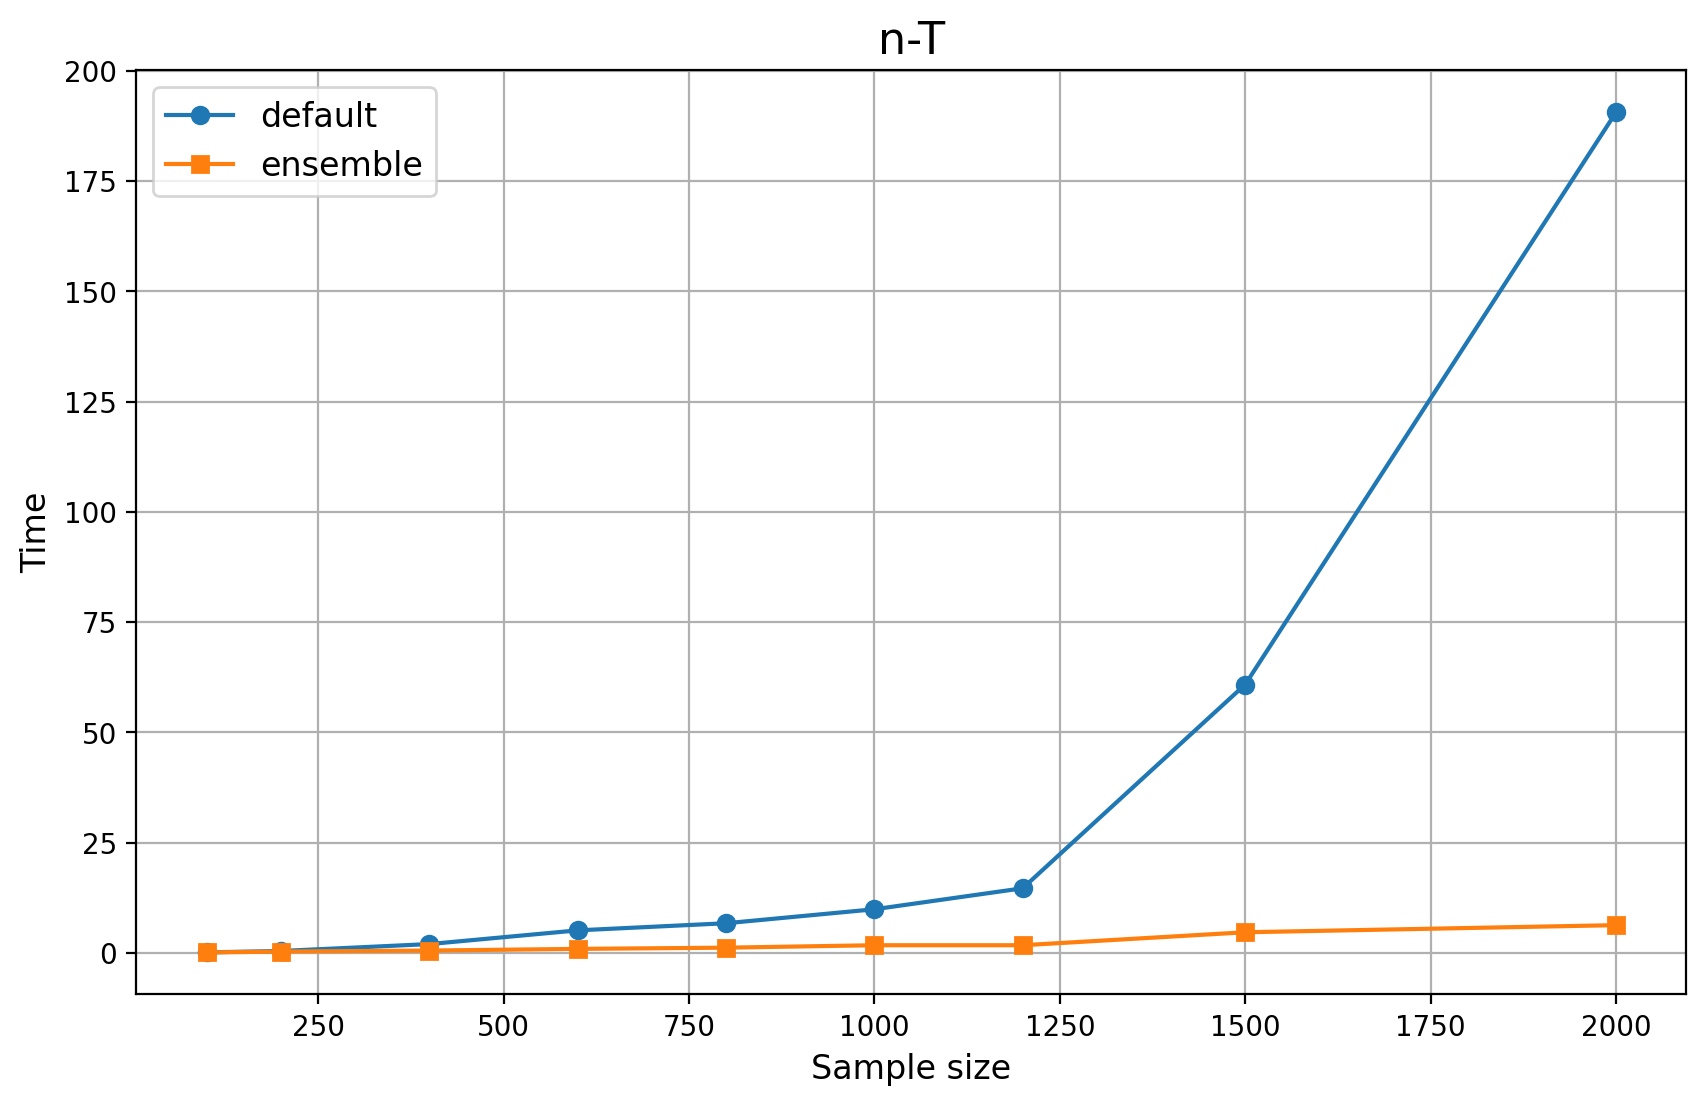

In [5]:
plt.figure(figsize=(10, 6),dpi=200)
plt.plot(result.index, result[None], label="default", marker="o")
plt.plot(result.index, result["Gamma"], label="ensemble", marker="s")
plt.title("n-T", fontsize=16)
plt.xlabel("Sample size", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [50]:
n = 400
t = 500
k = 4
for test_type in ["a","c","c=","cx","ACAT"]:
    print("Method:", test_type)
    for error_type in ['I', 'II']:
        start_time = time.time()
        print(f" -Type {error_type} Error: {simu(n, t, test_type, k, error_type):.2f}", end=" ")
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f" - {elapsed_time:.2f}s")

Method: a
 -Type I Error: 0.00  - 39.51s
 -Type II Error: 0.41  - 38.92s
Method: c
 -Type I Error: 0.00  - 40.49s
 -Type II Error: 0.39  - 42.13s
Method: c=
 -Type I Error: 0.02  - 40.77s
 -Type II Error: 0.36  - 40.61s
Method: cx
 -Type I Error: 0.00  - 40.42s
 -Type II Error: 0.39  - 44.89s
Method: ACAT
 -Type I Error: 0.04  - 40.76s
 -Type II Error: 0.33  - 43.34s
